# Building Ratio EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
import cv2

import seaborn as sns
from IPython.display import Image

## CSV 파일 불러오기

In [ ]:
train_bld_df = pd.read_csv('/content/drive/MyDrive/SharedData/eda/building_area.csv')

In [ ]:
train_bld_df.head(5)

,Unnamed: 0,file_name,count_0,count_1,count_total,Building Ratio(%)
0,0,BLD00001_PS3_K3A_NIA0276.txt,668463,380113,1048576,36.250400
1,1,BLD00002_PS3_K3A_NIA0276.txt,656694,391882,1048576,37.372780
2,2,BLD00004_PS3_K3A_NIA0276.txt,859422,189154,1048576,18.039131
3,3,BLD00006_PS3_K3A_NIA0276.txt,834213,214363,1048576,20.443249
4,4,BLD00008_PS3_K3A_NIA0276.txt,654140,394436,1048576,37.616348


In [ ]:
train_bld_df.shape

(1238, 6)

In [ ]:
a = train_bld_df['Building Ratio(%)'].sum()
b = a / 1238
print(b)

18.831888037479807


In [ ]:
# columns 확인
train_bld_df.columns

Index(['Unnamed: 0', 'file_name', 'count_0', 'count_1', 'count_total',
       'Building Ratio(%)'],
      dtype='object')

In [ ]:
# null 값 확인
train_bld_df.isnull().sum()

Unnamed: 0           0
file_name            0
count_0              0
count_1              0
count_total          0
Building Ratio(%)    0
dtype: int64

In [ ]:
# 데이터 타입 확인
train_bld_df.dtypes

Unnamed: 0             int64
file_name             object
count_0                int64
count_1                int64
count_total            int64
Building Ratio(%)    float64
dtype: object

## 불필요 컬럼 제거
- `count_0`, `count_1`, `count_total`

In [ ]:
df_train = train_bld_df[['file_name', 'Building Ratio(%)']]

## 데이터 정렬 (내림차순)
- 빌딩 면적이 가장 큰 이미지(전체 88.03% 차지) 확인


In [ ]:
df_train_des = df_train.sort_values(by = ['Building Ratio(%)'], ascending=False).reset_index(drop=True)

In [ ]:
df_train_des.head(5)

,file_name,Building Ratio(%)
0,BLD00615_PS3_K3A_NIA0277.txt,88.032436
1,BLD00677_PS3_K3A_NIA0277.txt,85.987663
2,BLD00601_PS3_K3A_NIA0277.txt,82.148457
3,BLD00654_PS3_K3A_NIA0277.txt,78.468514
4,BLD00610_PS3_K3A_NIA0277.txt,73.748589


In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00615_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00677_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00601_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00654_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00610_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

## 데이터 정렬 (오름차순)
- 빌딩 면적 0 인 이미지 : 48개

In [ ]:
df_train_asd = df_train.sort_values(by = ['Building Ratio(%)']).reset_index(drop=True)

In [ ]:
df_train_asd.head(55)

,file_name,Building Ratio(%)
0,BLD02658_PS3_K3A_NIA0375.txt,0.000000
1,BLD09111_PS3_K3A_NIA0386.txt,0.000000
2,BLD03317_PS3_K3A_NIA0376.txt,0.000000
3,BLD03323_PS3_K3A_NIA0376.txt,0.000000
4,BLD02773_PS3_K3A_NIA0375.txt,0.000000
5,BLD07684_PS3_K3A_NIA0383.txt,0.000000
6,BLD02713_PS3_K3A_NIA0375.txt,0.000000
7,BLD00798_PS3_K3A_NIA0277.txt,0.000000
8,BLD06954_PS3_K3A_NIA0382.txt,0.000000
9,BLD02711_PS3_K3A_NIA0375.txt,0.000000


In [ ]:
count_zero = df_train_asd[df_train_asd['Building Ratio(%)'] == 0]
count_zero.count()

file_name            48
Building Ratio(%)    48
dtype: int64

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD03701_PS3_K3A_NIA0376.png')

Output hidden; open in https://colab.research.google.com to view.

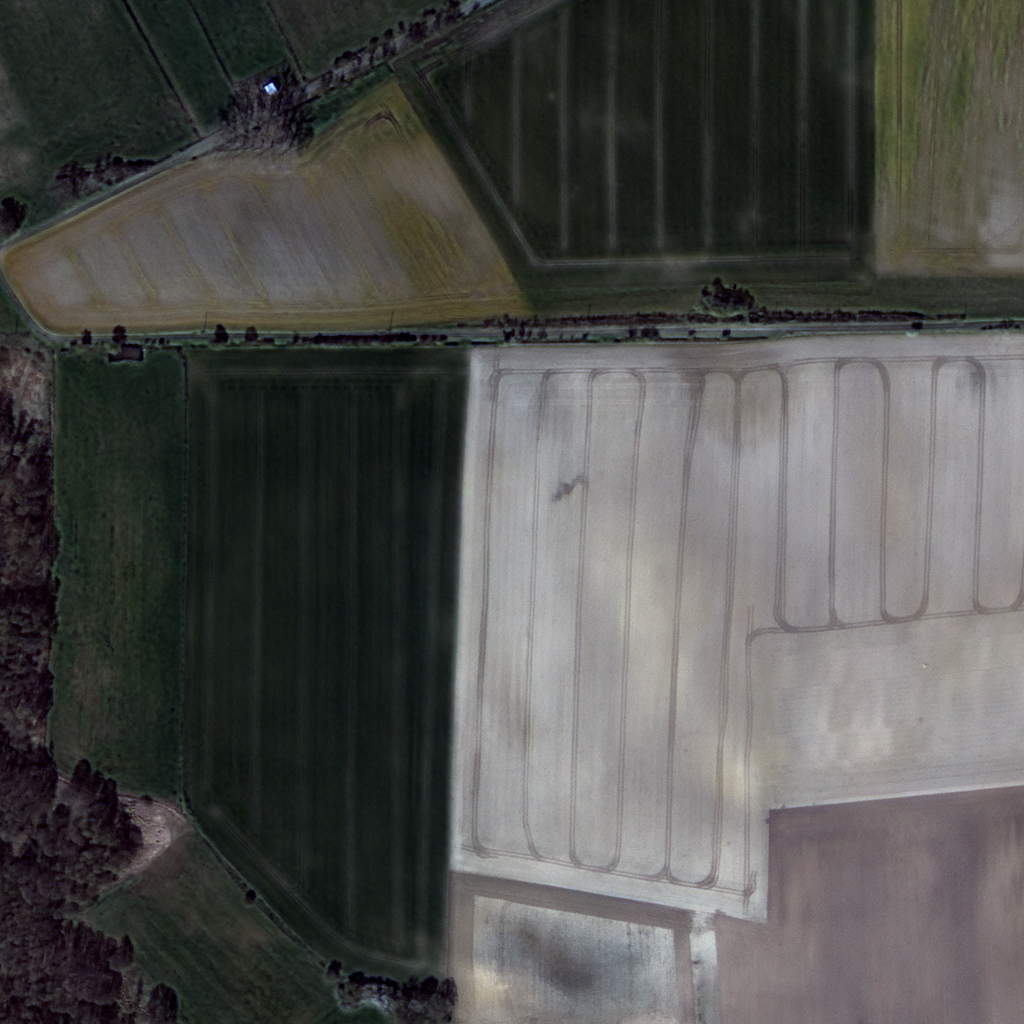

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD02993_PS3_K3A_NIA0375.png')

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/OBJ02449_PS3_K3_NIA0122.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00360_PS3_K3A_NIA0276.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 그래프로 확인
sns.distplot(df_train['Building Ratio(%)'])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=df_train['Building Ratio(%)'], nbinsx=60)])
fig.update_traces(marker=dict(color='cornsilk', line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text="Histogram of Building Ratio",
                  xaxis_title_text='building ratio(%)', # xaxis label
                  yaxis_title_text='count')
fig.show()

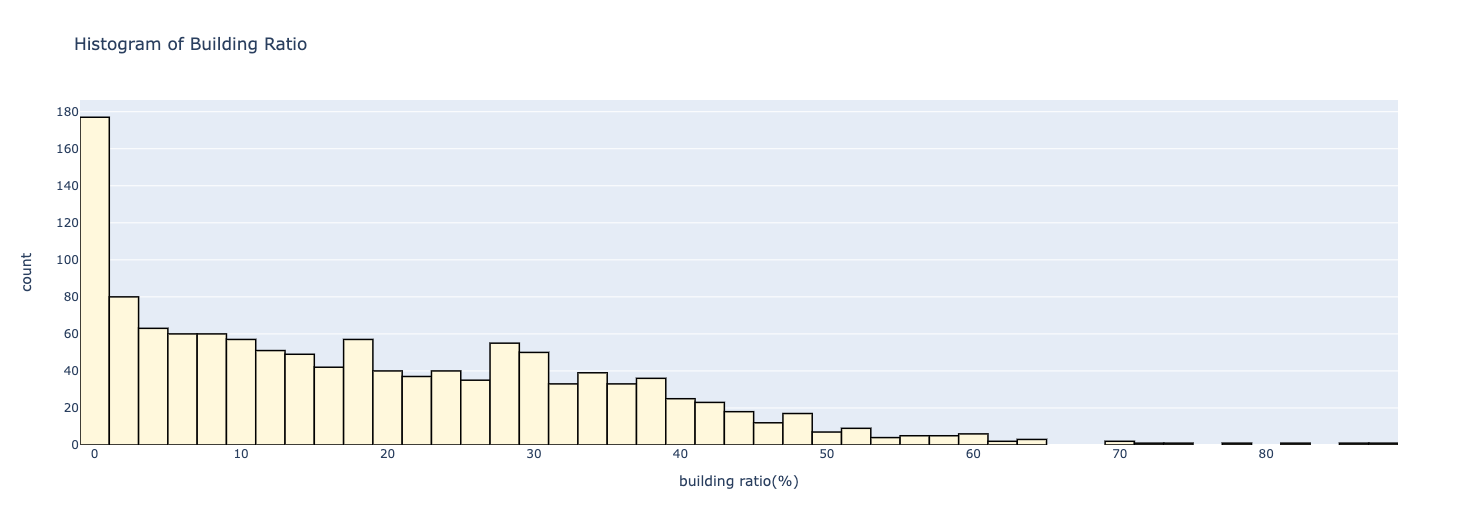

## 빌딩 면적 이미지 수 count (5% 이하)
- 이하 : 320개
- 이상 : 918개

In [ ]:
count_5 = df_train_des[df_train_des['Building Ratio(%)'] <= 5.00]
count_5

,file_name,Building Ratio(%)
918,OBJ03671_PS3_K3A_NIA0153.txt,4.96
919,BLD02127_PS3_K3A_NIA0374.txt,4.95
920,BLD02603_PS3_K3A_NIA0375.txt,4.95
921,OBJ01403_PS3_K3_NIA0093.txt,4.95
922,BLD03277_PS3_K3A_NIA0376.txt,4.94
...,...,...
1233,BLD09475_PS3_K3A_NIA0386.txt,0.00
1234,BLD02834_PS3_K3A_NIA0375.txt,0.00
1235,BLD03213_PS3_K3A_NIA0376.txt,0.00
1236,BLD00205_PS3_K3A_NIA0276.txt,0.00


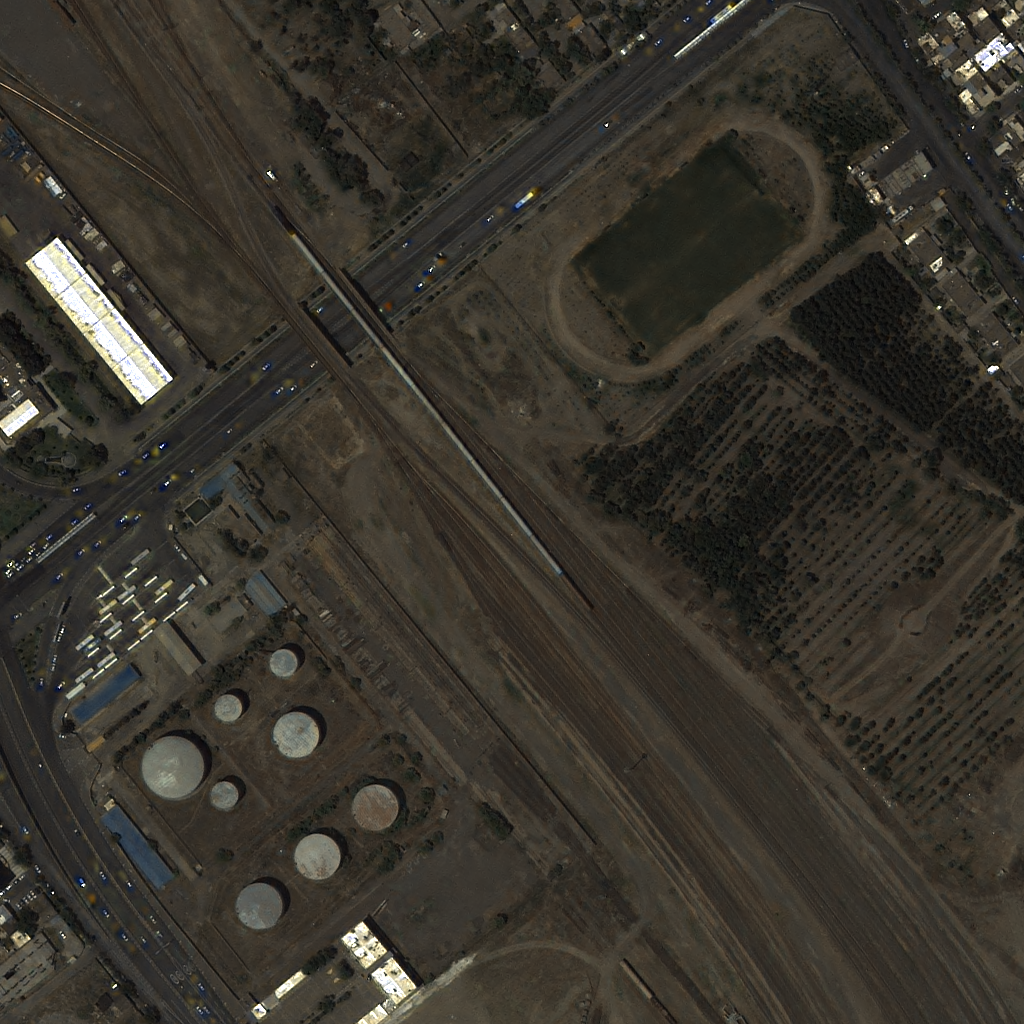

In [ ]:
# 5% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/OBJ03671_PS3_K3A_NIA0153.png')

In [ ]:
count_95 = df_train_des[df_train_des['Building Ratio(%)'] >= 5.00]
count_95

,file_name,Building Ratio(%)
0,BLD00615_PS3_K3A_NIA0277.txt,88.03
1,BLD00677_PS3_K3A_NIA0277.txt,85.99
2,BLD00601_PS3_K3A_NIA0277.txt,82.15
3,BLD00654_PS3_K3A_NIA0277.txt,78.47
4,BLD00610_PS3_K3A_NIA0277.txt,73.75
...,...,...
913,BLD01701_PS3_K3A_NIA0373.txt,5.11
914,BLD01817_PS3_K3A_NIA0374.txt,5.07
915,BLD02698_PS3_K3A_NIA0375.txt,5.07
916,BLD01653_PS3_K3A_NIA0373.txt,5.06


In [ ]:
# csv파일로 저장
count_95.to_csv('/content/drive/MyDrive/SharedData/eda/ratio(csv)/building_ratio_95.csv', mode='w')

## 빌딩 면적 이미지 수 count (10% 이하)
- 미만 : 466개
- 이상 : 772개

In [ ]:
count_10 = df_train_des[df_train_des['Building Ratio(%)'] < 10.00]
count_10

,file_name,Building Ratio(%)
772,BLD03008_PS3_K3A_NIA0375.txt,9.90
773,BLD00999_PS3_K3A_NIA0277.txt,9.89
774,BLD00186_PS3_K3A_NIA0276.txt,9.85
775,BLD02495_PS3_K3A_NIA0375.txt,9.80
776,BLD05848_PS3_K3A_NIA0380.txt,9.77
...,...,...
1233,BLD09475_PS3_K3A_NIA0386.txt,0.00
1234,BLD02834_PS3_K3A_NIA0375.txt,0.00
1235,BLD03213_PS3_K3A_NIA0376.txt,0.00
1236,BLD00205_PS3_K3A_NIA0276.txt,0.00


In [ ]:
# 10% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD03008_PS3_K3A_NIA0375.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
count_90 = df_train_des[df_train_des['Building Ratio(%)'] >= 10.00]
count_90

,file_name,Building Ratio(%)
0,BLD00615_PS3_K3A_NIA0277.txt,88.03
1,BLD00677_PS3_K3A_NIA0277.txt,85.99
2,BLD00601_PS3_K3A_NIA0277.txt,82.15
3,BLD00654_PS3_K3A_NIA0277.txt,78.47
4,BLD00610_PS3_K3A_NIA0277.txt,73.75
...,...,...
767,BLD02620_PS3_K3A_NIA0375.txt,10.08
768,BLD10924_PS3_K3A_NIA0389.txt,10.06
769,BLD09479_PS3_K3A_NIA0386.txt,10.06
770,BLD01650_PS3_K3A_NIA0373.txt,10.01


In [ ]:
# csv파일로 저장
count_90.to_csv('/content/drive/MyDrive/SharedData/eda/building_ratio_90.csv', mode='w')

## 빌딩 면적 이미지 수 count (15% 이하)
- 이하 : 597개
- 이상 : 641개

In [ ]:
count_15 = df_train_des[df_train_des['Building Ratio(%)'] <= 15.00]
count_15

,file_name,Building Ratio(%)
641,BLD00869_PS3_K3A_NIA0277.txt,14.97
642,BLD02178_PS3_K3A_NIA0374.txt,14.93
643,OBJ01400_PS3_K3_NIA0093.txt,14.93
644,BLD04038_PS3_K3A_NIA0377.txt,14.92
645,BLD07670_PS3_K3A_NIA0383.txt,14.92
...,...,...
1233,BLD09475_PS3_K3A_NIA0386.txt,0.00
1234,BLD02834_PS3_K3A_NIA0375.txt,0.00
1235,BLD03213_PS3_K3A_NIA0376.txt,0.00
1236,BLD00205_PS3_K3A_NIA0276.txt,0.00


In [ ]:
# 15% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_buildings_data/BLD00869_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
count_85 = df_train_des[df_train_des['Building Ratio(%)'] >= 15.00]
count_85

,file_name,Building Ratio(%)
0,BLD00615_PS3_K3A_NIA0277.txt,88.03
1,BLD00677_PS3_K3A_NIA0277.txt,85.99
2,BLD00601_PS3_K3A_NIA0277.txt,82.15
3,BLD00654_PS3_K3A_NIA0277.txt,78.47
4,BLD00610_PS3_K3A_NIA0277.txt,73.75
...,...,...
636,BLD09480_PS3_K3A_NIA0386.txt,15.19
637,BLD00056_PS3_K3A_NIA0276.txt,15.17
638,BLD00714_PS3_K3A_NIA0277.txt,15.16
639,BLD12002_PS3_K3A_NIA0391.txt,15.15


In [ ]:
# csv파일로 저장
count_85.to_csv('/content/drive/MyDrive/SharedData/eda/building_ratio_85.csv', mode='w')

## 각 % 이하 이미지 개수가 전체에서 차지하는 비율

In [ ]:
print(' 5% 이하 이미지 비율 : {:.2f}%'.format(count_5.shape[0]/df_train.shape[0]*100))
print('10% 이하 이미지 비율 : {:.2f}%'.format(count_10.shape[0]/df_train.shape[0]*100))
print('15% 이하 이미지 비율 : {:.2f}%'.format(count_15.shape[0]/df_train.shape[0]*100))

 5% 이하 이미지 비율 : 25.85%
10% 이하 이미지 비율 : 37.64%
15% 이하 이미지 비율 : 48.22%
